In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import operator

In [2]:
hdf_file_path = "../data/20221029-134728.hdf5"

In [63]:
'''
edges:
    - source: sub:raw
    target: save:raw # will be saved in hdf (key '/raw')
    - source: sub:events
    target: save:events # will be saved in hdf (key '/events')
    - source: sub:filtered
    target: save:filtered # will be stored in hdf (key '/filtered')
    - source: sub:bands
    target: save:bands  # will be stored in hdf (key '/bands')
'''

def get_dfs():
    paths = ['/raw', '/events', '/filtered', '/bands']
    result = []

    for path in paths:
        ts_df = pd.read_hdf(hdf_file_path, path)
        result.append(ts_df)
    return (r for r in result)

def display_ts(ts_df, title):
    ts = ts_df.cumsum()
    ts.plot();
    ts_df.plot(title=title)
    plt.show()

def get_df_range_event(ts_df, event_df, d):
    start_events = event_df.loc[(event_df.data == d)]
    print(start_events)
    ref_start_date = start_events.index[0]
    start = event_df.loc[(event_df.data == d) & (event_df.label == 'start')].index[0]
    end = event_df.loc[(event_df.data == d) & (event_df.label == 'stop')].index

    if len(end) == 0:
        # Get the row after ref_start_date
        end = event_df.index[event_df.index.get_loc(ref_start_date, method='ffill') + 1]
    else:
        end = end[0]

    return ts_df[start:end]

def extract_classes(df_events):
    classes = []
    for index, row in df_events.iterrows():
        if row['label'] == 'start' and row['data'] not in classes:
            classes.append(row['data'])
    return classes

def viz_by_class(ts_df, event_df):
    '''
        This function will plot the time series for each class
    '''
    classes = extract_classes(event_df)

    fig, axes = plt.subplots(nrows=len(classes), ncols=1, figsize=(20, 10))

    for c in classes:
        print(c)
        ts = get_df_range_event(ts_df, event_df, c)
        ts.plot(ax=axes[classes.index(c)], title=c)

    fig.tight_layout()
    plt.show()
    

In [14]:
(df_raw, df_events, df_filtered, df_bands) = get_dfs()

In [ ]:
get_df_range_event(df_raw, df_events, '"base"')

"base"
                            label    data
2022-10-29 13:51:24.027500  start  "base"
"base2"
                               label     data
2022-10-29 13:51:39.196600098  start  "base2"
"base3"
                               label     data
2022-10-29 13:52:14.838300049  start  "base3"
2022-10-29 13:52:41.032600098   stop  "base3"


/var/folders/s9/mx70pkk11bq2wl2cnrt6nfwc0000gn/T/ipykernel_13592/149633766.py:37: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  end = event_df.index[event_df.index.get_loc(ref_start_date, method='ffill') + 1]
/var/folders/s9/mx70pkk11bq2wl2cnrt6nfwc0000gn/T/ipykernel_13592/149633766.py:37: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  end = event_df.index[event_df.index.get_loc(ref_start_date, method='ffill') + 1]


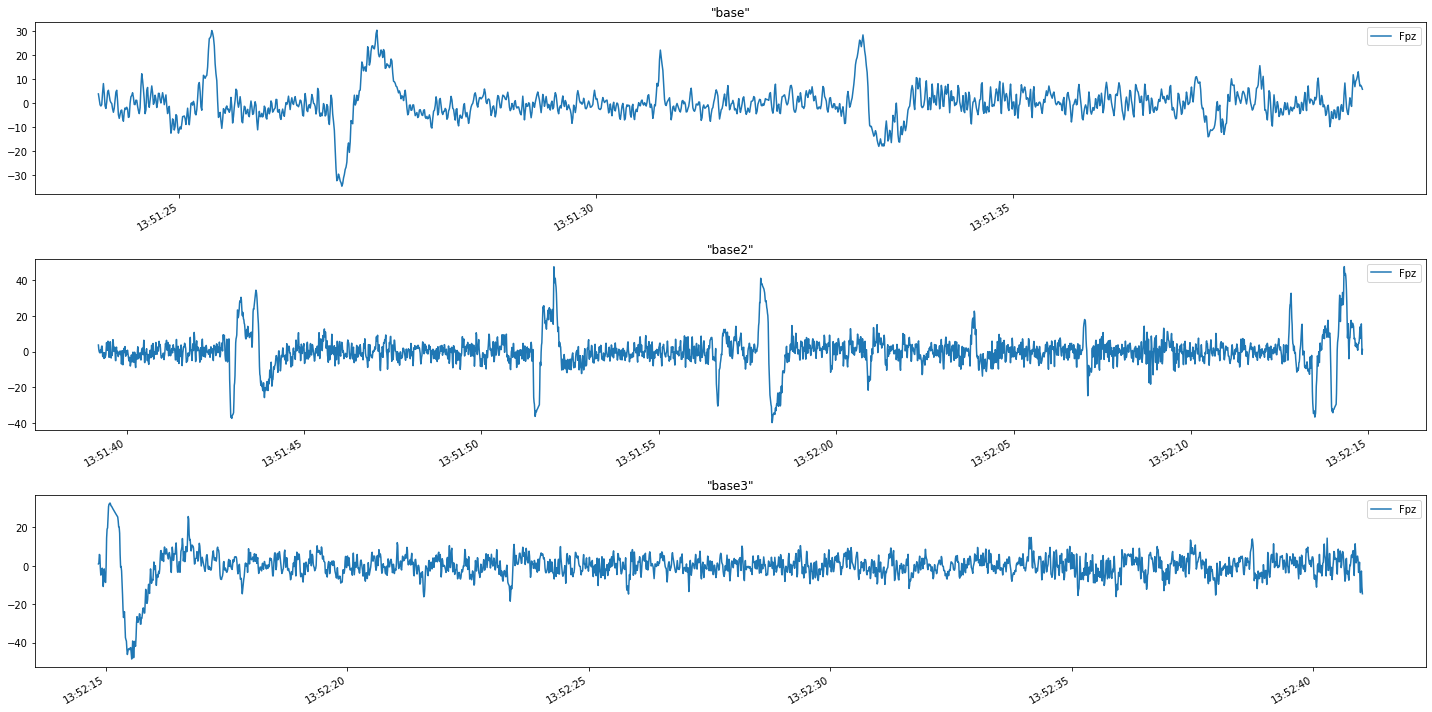

In [71]:
viz_by_class(df_filtered, df_events)

In [9]:
df_events

,label,data,2022-10-29 13:51:39.196600000
2022-10-29 13:51:24.027500000,start,"""base""",NaN
2022-10-29 13:51:39.196600098,start,"""base2""",NaN
2022-10-29 13:52:14.838300049,start,"""base3""",NaN
2022-10-29 13:52:41.032600098,stop,"""base3""",NaN


Raw data


,Fpz
2022-10-29 13:47:31.382763,2.930950
2022-10-29 13:47:31.392763,5.090597
2022-10-29 13:47:31.402763,7.327374
2022-10-29 13:47:31.412763,-4.704945
2022-10-29 13:47:31.422763,9.101370
...,...
2022-10-29 13:55:06.822763,3.470861
2022-10-29 13:55:06.832763,-6.247551
2022-10-29 13:55:06.842763,-18.125610
2022-10-29 13:55:06.852763,-18.819782


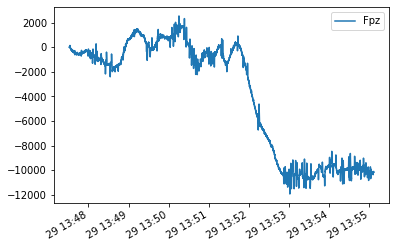

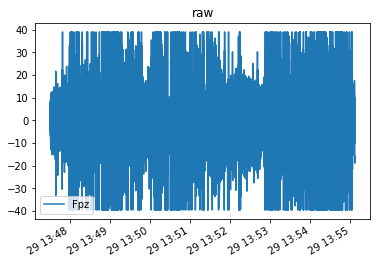

In [62]:
print("Raw data")
display(df_raw)
display_ts(df_raw, "raw")

Filtered data


,Fpz
2022-10-29 13:47:31.382763,-4.440892e-15
2022-10-29 13:47:31.392763,5.504182e-01
2022-10-29 13:47:31.402763,2.448869e+00
2022-10-29 13:47:31.412763,1.386845e+00
2022-10-29 13:47:31.422763,-2.294194e+00
...,...
2022-10-29 13:55:06.752763,3.758089e+00
2022-10-29 13:55:06.762763,-1.635348e+00
2022-10-29 13:55:06.772763,-4.920655e-01
2022-10-29 13:55:06.782763,1.373207e+00


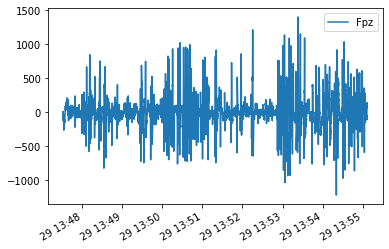

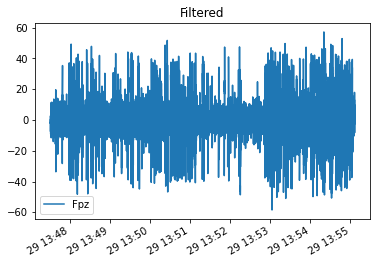

In [63]:
print("Filtered data")
display(df_filtered)
display_ts(df_filtered, "Filtered")

Bands data


,Fpz_delta,Fpz_theta,Fpz_alpha,Fpz_beta,Fpz_gamma
2022-10-29 13:47:34.432763,3.932776,0.395609,0.895813,1.255677,0.621563
2022-10-29 13:47:35.502763,2.474417,0.658044,0.950019,1.232967,0.774848
2022-10-29 13:47:36.432763,1.430164,0.990185,0.726503,1.360269,0.727162
2022-10-29 13:47:37.432763,1.169865,0.994588,0.666712,2.019744,0.808428
2022-10-29 13:47:38.502763,1.781787,1.043360,0.566914,1.857179,0.772182
...,...,...,...,...,...
2022-10-29 13:55:02.472763,21.933873,3.363276,1.328329,2.873827,1.489868
2022-10-29 13:55:03.402763,27.147243,4.572637,1.618326,2.821403,1.421145
2022-10-29 13:55:04.412763,31.388391,4.973223,2.301944,3.229026,1.440405
2022-10-29 13:55:05.382763,15.908424,2.375106,2.301944,2.249088,1.440405


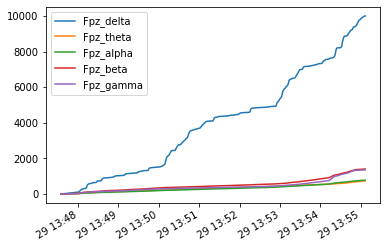

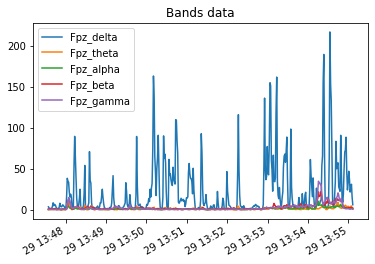

In [64]:
print("Bands data")
display(df_bands)
display_ts(df_bands, "Bands data")